In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os

os.environ["MUJOCO_GL"] = "glx"
os.environ["DISPLAY"] = ":1"
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["TORCH_USE_CUDA_DSA"] = "1"


In [ ]:
from pathlib import Path

import mediapy as media
from config_tools.common import get_typed_root_config
from hydra import compose, initialize
from mujoco_sim.env.push_env import PushEnv, PushEnvCfg

# 1. Loading Mujoco environment

In [10]:
overrides = []

config_path = Path("phys_sim/configurations/pusher_with_rod.yaml")

with initialize(version_base=None, config_path=str("../../" / config_path.parent)):
    hydra_cfg = compose(config_name=str(config_path.name), overrides=overrides)


env_cfg: PushEnvCfg = get_typed_root_config(hydra_cfg, PushEnvCfg)
env = PushEnv(env_cfg)

Loading input MjModel


""

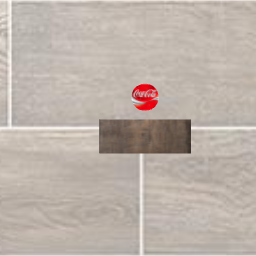

In [11]:
image = env.render("birdview")
media.show_image(image)

# 2. Rolling out dynamics to create a trajectory

In [13]:
import numpy as np

"""
could have used the existing demo,
but we will create one since I forgot to save the seg. mask.
"""


traj_video = []
traj_qpos = []


def get_obs(env):
    image = env.render("birdview")
    qpos = env.data.get_body_xpos(f"pusher_main").copy()

    traj_video.append(image)
    traj_qpos.append(qpos)


# take a photo fo the mask
env.reset()
init_seg_mask = env.render("birdview", render_segmentation=True)

# reset and generate a traj.
env.reset()
env.controller.interpolator.total_steps = 32 * 2

# position_based_command = np.array([0.0, 1.0])
position_based_command = np.array([0.0, -0.82])
horizon = 70
for i in range(horizon):
    env.step(position_based_command)

    if get_obs is not None:
        get_obs(env)

media.show_video(traj_video)

print(env.data.get_body_xpos(f"pusher_main").copy())
print(env.sim.data.get_joint_qpos("pusher_y_joint"))

[-1.56612060e-05 -4.36748956e-01  3.80000000e-01]
-0.7967577768457962
